# Keras Layer Types
These are notes on Keras layers. They are in progress. I was just messing around to see what I could do. 

## Functional Composition

## Sequential Composition
Linear stack of layers

### 1. Dense Layers

### 2. Recurrent Neural Network

### 3. Convolutuion or Pooling Layers

### 4. Regularization
This layer prevents overfitting>>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [3]:
numberOfClasses = 10

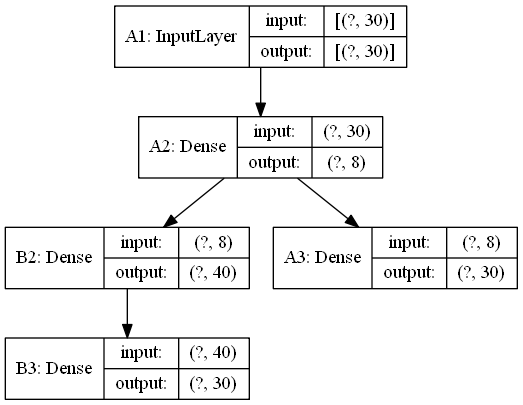

In [15]:
A1 = keras.layers.Input(shape=(30,),name='A1')
A2 = keras.layers.Dense(8, activation='relu',name='A2')(A1)
A3 = keras.layers.Dense(30, activation='relu',name='A3')(A2)

# Name = keras.layers.Dense(...)(input layer)
B2 = keras.layers.Dense(40, activation='relu',name='B2')(A2)
B3 = keras.layers.Dense(30, activation='relu',name='B3')(B2)

model = keras.models.Model(inputs=[A1],outputs=[A3,B3])
plot_model(model, show_shapes='True', show_layer_names='True', expand_nested='True')

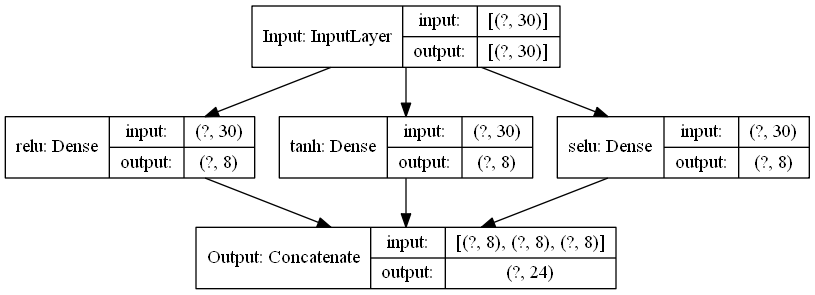

In [26]:
Input = keras.layers.Input(shape=(30,),name='Input')
H1 = keras.layers.Dense(8, activation='relu', name='relu')(Input)
H2 = keras.layers.Dense(8, activation='tanh', name='tanh')(Input)
H3 = keras.layers.Dense(8, activation='selu', name='selu')(Input)

Output = keras.layers.concatenate([H1, H2, H3], name='Output')

model = keras.models.Model(inputs=[Input],outputs=[Output])
plot_model(model, show_shapes='True', show_layer_names='True', expand_nested='True')

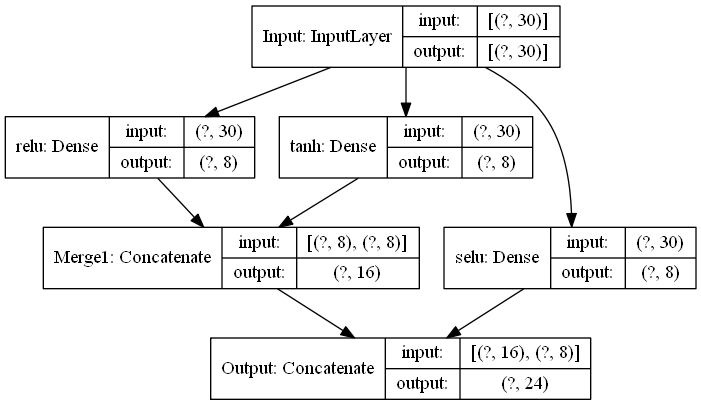

In [29]:
Input = keras.layers.Input(shape=(30),name='Input')
H1 = keras.layers.Dense(8, activation='relu', name='relu')(Input)
H2 = keras.layers.Dense(8, activation='tanh', name='tanh')(Input)
H3 = keras.layers.Dense(8, activation='selu', name='selu')(Input)

H4 = keras.layers.concatenate([H1, H2], name='Merge1')
Output = keras.layers.concatenate([H4, H3], name='Output')

model = keras.models.Model(inputs=[Input],outputs=[Output])
plot_model(model, show_shapes='True', show_layer_names='True', expand_nested='True')

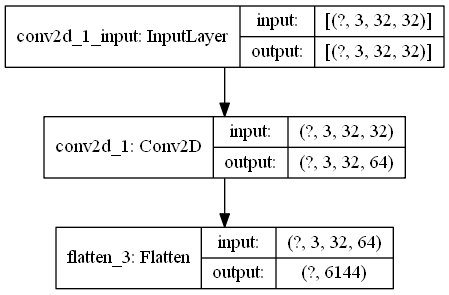

In [35]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3),
                 input_shape=(3, 32, 32), padding='same',))
# now: model.output_shape == (None, 64, 32, 32)

model.add(keras.layers.Flatten())
# now: model.output_shape == (None, 65536)
plot_model(model, show_shapes='True', show_layer_names='True', expand_nested='True')

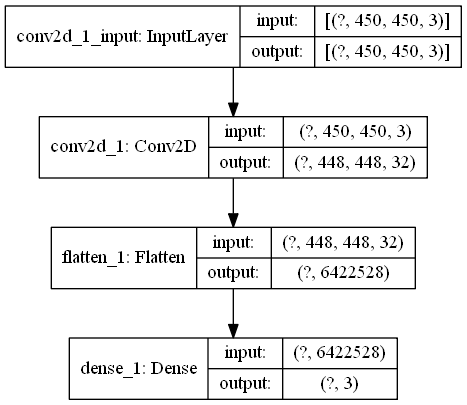

In [5]:
cnn_model = keras.Sequential()
cnn_model.add(keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(450,450,3)))
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(3,activation='softmax'))

plot_model(cnn_model, show_shapes='True', show_layer_names='True', expand_nested='True')

Input = keras.layers.Input(shape=(30),name='Input')
H1 = keras.layers.Conv2(32,(3,3), activation='relu',input_shape=(450,450,3))(Input)
H2 = keras.layers.Flatten()(H1)

H3 = keras.layers.Dense(3,activation='softmax')(H2)

H4 = keras.layers.concatenate([H1, H2], name='Merge1')
Output = keras.layers.concatenate([H4, H3], name='Output')

model = keras.models.Model(inputs=[Input],outputs=[Output])
plot_model(model, show_shapes='True', show_layer_names='True', expand_nested='True')


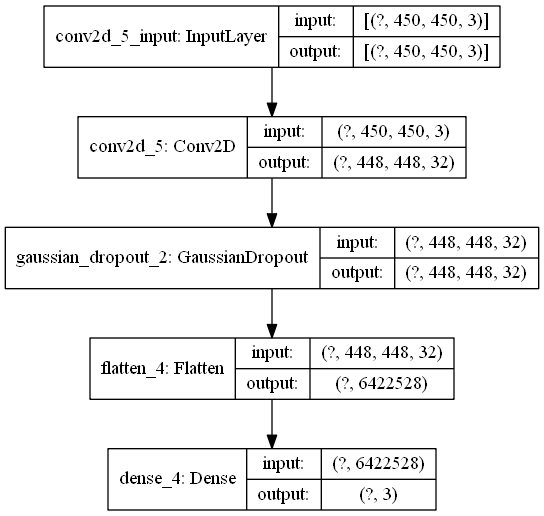

In [9]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(450,450,3)),
    keras.layers.GaussianDropout(.3),
    keras.layers.Flatten(),
    keras.layers.Dense(3,activation='softmax')
])

plot_model(cnn_model, show_shapes='True', show_layer_names='True', expand_nested='True')